In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
!pip install torchvision
import torchvision
from torchvision import transforms

In [ ]:
from torch.utils.data import Dataset, DataLoader

In [ ]:
train_df = torchvision.datasets.FashionMNIST(root='./root', train=True,
                                     transform=torchvision.transforms.ToTensor(), download=True)
test_df = torchvision.datasets.FashionMNIST(root='./root', train=False,
                                     transform=torchvision.transforms.ToTensor(), download=True)

In [ ]:
def show_image(img, res):
  plt.imshow(img, cmap='gray')
  plt.title(f"y = {res}")
  plt.axis('off')
  plt.show()

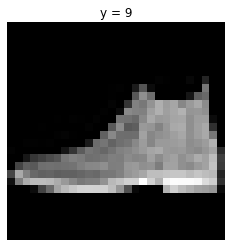

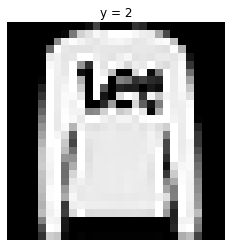

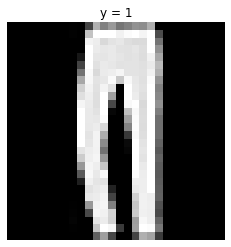

In [ ]:
for i in range(3):
  show_image(test_df[i][0][0].numpy(), test_df[i][1])

In [ ]:
from torch.nn.modules.pooling import MaxPool2d
class CNN(nn.Module):

  def __init__(self):

    super(CNN, self).__init__()
    self.hidden = nn.Sequential(nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1),
                                nn.BatchNorm2d(32),
                                nn.ReLU(),
                                nn.MaxPool2d(kernel_size=2,
                                             stride=2),
                                nn.Conv2d(in_channels=32, out_channels=64, kernel_size=2, stride=1),
                                nn.BatchNorm2d(64),
                                nn.ReLU(),
                                nn.MaxPool2d(kernel_size=2,
                                             stride=2),
                                
                                nn.Flatten(),
                                nn.Linear(2304, 512),
                                nn.Linear(512, 128),
                                nn.Linear(128, 10)
                          
                                )
    
  def forward(self, x):

    x = self.hidden(x)
    return x


In [ ]:
def He_init(layer):
  if type(layer) in [nn.Linear, nn.Conv2d]:
    torch.nn.init.kaiming_normal_(layer.weight, nonlinearity='relu')

In [ ]:
device = torch.device('cuda')

criterion = nn.CrossEntropyLoss()
model = CNN()
model.to(device)
optimizer = torch.optim.Adam(model.parameters())
# print(train_df[0][0])
# print(model(train_df[0][0].view(-1, 1, 28, 28)).shape)
epochs = 100
print(model)


CNN(
  (hidden): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(2, 2), stride=(1, 1))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Flatten(start_dim=1, end_dim=-1)
    (9): Linear(in_features=2304, out_features=512, bias=True)
    (10): Linear(in_features=512, out_features=128, bias=True)
    (11): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [ ]:
# model.apply(He_init)

In [ ]:
trainloader = DataLoader(dataset=train_df, batch_size=32, shuffle=True)
testloader = DataLoader(dataset=test_df, batch_size=100)

In [ ]:
def Train(epochs, model, optimizer, criterion, ):
  LOSS = []
  ACC = []
  loss = torch.tensor([0.])

  for i in range(epochs):

    model.train()
    total = 0
    for x, y in trainloader:
      x, y = (x).to(device), y.to(device)
      optimizer.zero_grad()
      yhat = model(x)
      loss = criterion(yhat, y)
      loss.backward()
      optimizer.step()
      total += loss.item()
    LOSS.append(total)

    model.eval()
    count = 0
    for x, y in testloader:
      x, y = (x).to(device), y.to(device)
      _, label = torch.max(model(x), 1)
      count += (label==y).sum()

    accuracy = count/len(test_df)
    ACC.append(accuracy.item())
    print(f">>>Epoch {i} successfully completed")

  return LOSS, ACC

In [ ]:
epochs=10

In [ ]:
%%time
Loss, Accuracy = Train(epochs, model, optimizer, criterion)



>>>Epoch 0 successfully completed
>>>Epoch 1 successfully completed
>>>Epoch 2 successfully completed
>>>Epoch 3 successfully completed
>>>Epoch 4 successfully completed
>>>Epoch 5 successfully completed
>>>Epoch 6 successfully completed
>>>Epoch 7 successfully completed
>>>Epoch 8 successfully completed
>>>Epoch 9 successfully completed
CPU times: user 4min 18s, sys: 2.5 s, total: 4min 20s
Wall time: 4min 24s


In [ ]:
def plot(LOSS, ACC):
  fig, ax1 = plt.subplots()
  color1 = 'r'
  ax1.plot(LOSS, label='Cost', color=color1)
  ax1.set_xlabel('Epoch', color='g')
  ax1.set_ylabel('Cost', color=color1)
  ax1.tick_params(axis='y', color=color1)

  ax2 = ax1.twinx()
  color2 = 'b'
  ax2.plot(ACC, label='Accuracy', color=color2)
  ax2.tick_params(axis='y', color=color2)
  ax2.set_ylabel('Accuracy', color=color2)
  fig.tight_layout()
  plt.show()

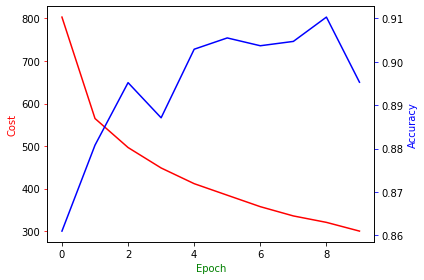

In [ ]:
plot(Loss, Accuracy)